# Summary

* Building model takes time. This section helps you produce some preliminary results. 

> 1. Frequency Analysis
2. Distribution Analysis
3. Correlation Analysis
4. Outlier Analysis

* Main python functions covered in this chapter:

> 1. **freq_analysis()** function: from class function **SupportingFunctions** which performs frequency analysis on a categorical variable and draws a line chart. 
2. **distribution_analysis_histo()** function: from class function **SuppportingFunctions** which performs distribution analysis on a numerical variable and draws a bar chart. 
3. **outlier_treatment_cap_floor()** function: from class function **SuppportingFunctions** which cap or floor outliers to a specified percentile (normally 1% for floor and 99% for cap) 
4. **correlation_analysis()** function: from class function **SuppportingFunctions** which performs correlation analysis between two numerical variables and draws a sc

# Load Libraries

In [1]:
## system config ##
import sys
import os
import numpy as np
nb_dir = os.path.split(os.getcwd())[0] + "\\" + os.path.split(os.getcwd())[1] + "\\Self-defined Modules"
sys.path.append(nb_dir) # Add a directory into sys path

print ('Python', sys.version)

Python 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


In [2]:
## self-defined modules ##
import SupportingFunctions as SF  # a collection of useful funtions such as load/write, data analysis, plotting, etc.

# Import Data

In [3]:
## data loading ##
df_model = SF.load_csv(os.path.split(os.getcwd())[0] + "\\2. Data\\application_train.csv")

time elapsed: 2.677997589111328 seconds
dataframe dimension: (307511, 119)


# Frequency Analysis

Given a categorical column, calculates target rate for each value in the column. 


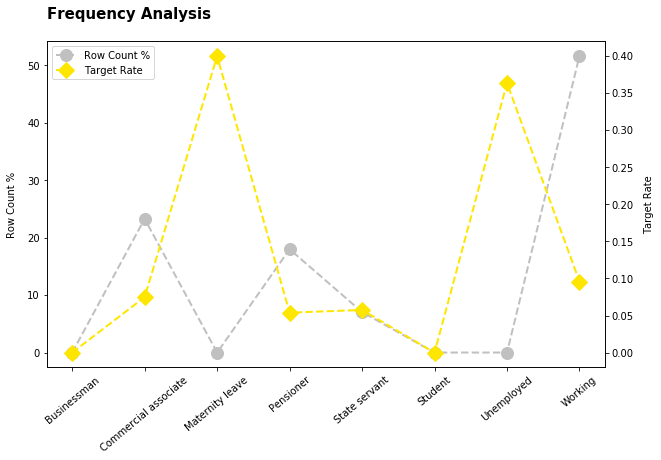

,NAME_INCOME_TYPE,Row Count,Row Count %,Target Count,Target Count %,Target Rate
0,Businessman,10,0.00,0,0.00,0.000000
1,Commercial associate,71617,23.29,5360,21.59,0.074843
2,Maternity leave,5,0.00,2,0.01,0.400000
3,Pensioner,55362,18.00,2982,12.01,0.053864
4,State servant,21703,7.06,1249,5.03,0.057550
5,Student,18,0.01,0,0.00,0.000000
6,Unemployed,22,0.01,8,0.03,0.363636
7,Working,158774,51.63,15224,61.33,0.095885


In [4]:
# freq_analysis(data_frame, categorical_var, target_var)
SF.freq_analysis(df_model, 'NAME_INCOME_TYPE', 'TARGET')

# Distribution Analysis - Histogram

Draw histogram and add a "best fit line" using the data in the given column

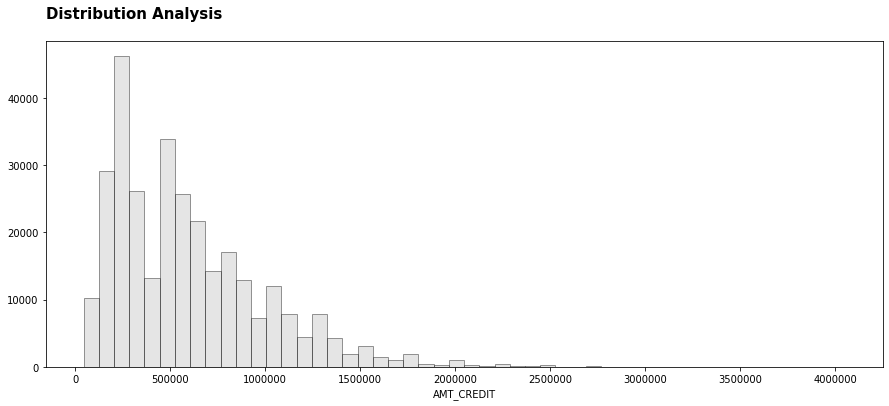

In [5]:
# distribution_analysis_histo(data_frame, column_name)
SF.distribution_analysis_histo(df_model, 'AMT_CREDIT')

# Outlier Analysis

* Use 3 continuous variables as example - AMT_ANNUITY, AMT_INCOME_TOTAL, and AMT_CREDIT; 
* Use built-in Pandas function "describe" to check for outliers. If min is significantly lower than bottom 1%, or if max is significantly higher than top 1%, then outliers exist. 
* Below demonstrates 2 outlier treatments - 

> 1. Cap/floor by percentiles: replace the outlier value with top 1% or bottom 1% value
2. Set outlier value to missing and use imputation methods to impute (mean value imputation in the example below) 


In [6]:
# Check Outlier - Continuous Variable
ls_var=['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']
df_model[ls_var].describe(percentiles=[0.01, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT
count,307499.000000,3.075110e+05,3.075110e+05
mean,27108.573909,1.687979e+05,5.990260e+05
std,14493.737315,2.371231e+05,4.024908e+05
min,1615.500000,2.565000e+04,4.500000e+04
0.5%,5253.705000,4.500000e+04,6.126300e+04
1%,6182.910000,4.500000e+04,7.641000e+04
10%,11074.500000,8.100000e+04,1.800000e+05
20%,14701.500000,9.900000e+04,2.547000e+05
30%,18189.000000,1.125000e+05,3.063060e+05
40%,21865.500000,1.350000e+05,4.320000e+05


In [7]:
# Treat Outlier - Option 1
# if you want to cap/floor the variable by percentiles
ls_var=['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']
df_model_treated = SF.outlier_treatment_cap_floor(df_model, ls_var, cap_percentile=0.99, floor_percentile = None)

In [8]:
# Treat Outlier - Option 2
# if you want to set outliers to values to missing
ls_var = ['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']

upper_perc = 0.99 # upper threshold - 99 percentile
lower_perc = 0.01 # lower threshold - 1 percentile

df_model_treated = df_model.copy()
for var in ls_var:
    print("variable: " + var) 
    
    upper_thrd = df_model_treated[var].quantile(upper_perc)
    df_model_treated[var] = np.where(df_model_treated[var] >= upper_thrd, np.nan, df_model_treated[var])

    lower_thrd = df_model_treated[var].quantile(lower_perc)
    df_model_treated[var] = np.where(df_model_treated[var] <= lower_thrd, np.nan, df_model_treated[var])
    
    # if you want to fill na with mean value
    val_fill = df_model_treated[var].mean()
    df_model_treated[var] = df_model_treated[var].fillna(val_fill)

print("")
print("----COMPLETE----")

variable: AMT_ANNUITY
variable: AMT_INCOME_TOTAL
variable: AMT_CREDIT

----COMPLETE----


# Correlation Analysis

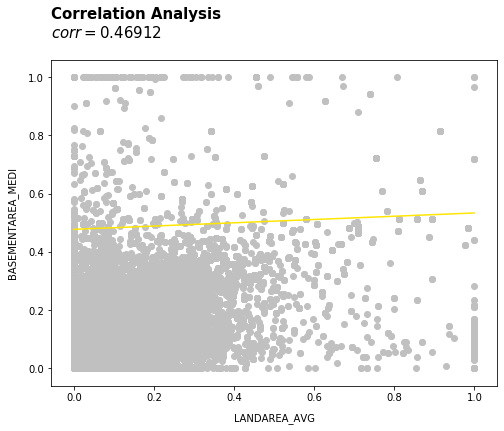

In [9]:
# correlation_analysis(data_frame, column_1, column_2)
# calculate correlation coefficient of the given 2 columns
SF.correlation_analysis(df_model, 'LANDAREA_AVG', 'BASEMENTAREA_MEDI')